In [3]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 데이터 생성

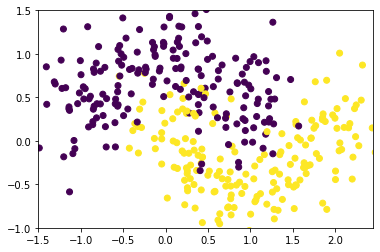

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
# 각 색깔이 y 다른 y 의 label 을 나타낸다. 
plt.axis([-1.5, 2.45, -1, 1.5]);

# 단일 model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Single tree
model_single = DecisionTreeClassifier(random_state=42)
model_single.fit(X_train, y_train)
y_pred_tree = model_single.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


# bagging 을 한 model

In [22]:
from sklearn.ensemble import BaggingClassifier
# Many trees (bagging)
model_bag = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=0.2, bootstrap=True, oob_score=True, random_state=42)
# BaggingClassifier
# 맨 앞 : 내가 넣을 model
# n_estimators : 모형의 갯수 The number of base estimators in the ensemble
#              : (default) 10
# max_samples : 몇개의(비율의) sample 을 이용해 각 모형들을 구축할 것인가
#             : (default) 1(즉 원 data 의 수와 똑같이 뽑겟다!)
# bootstrap : sample 이 복원추출 되었는지
#           : (default) True
# obb_score : out-of-bag samples 을 generalization error 를 계산하는것에 사용할것인지
#           : (default) False


model_bag.fit(X_train, y_train)
y_pred = model_bag.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.928


bagging 을 한 데이터의 accuracy score 가 더 좋은것을 알 수 있다.